<h1 style="color:green">CICIoT Preprocessing, Analysis and Visualization with Python</h1>


In [ ]:
import numpy as np
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import pyspark.pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

## Dataset Directory

In [ ]:
DATASET_DIRECTORY = 'C:/Users/TRETEC/Desktop/cic/'

## import the dataset paths

In [ ]:
df_sets = [DATASET_DIRECTORY+k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()


## Create sparkSession

In [ ]:
spark=SparkSession.builder.appName('Dataframe').getOrCreate()

## Read dataset parts and Concatenating DataFrames using pyspark.pandas and then convert to pandas

In [ ]:
dfs = []
# Read each CSV file and append the DataFrame to the list
for file_name in df_sets:
    dff = ps.read_csv(file_name)
    dfs.append(dff)
psdf = ps.concat(dfs)
df = psdf.to_pandas()

In [ ]:
# p2 = pd.concat((pd.read_csv(DATASET_DIRECTORY+filename) for filename in part_two))

### Selecting Relevant Features

In [ ]:
df_num = df[
    [
        "flow_duration",
        "Header_Length",
        "Protocol Type",
        "Duration","Rate",
        "Srate","Drate","fin_flag_number",
        "syn_flag_number",
        "rst_flag_number",
        "psh_flag_number",
        "ack_flag_number",
        "ece_flag_number",
        "cwr_flag_number",
        "ack_count",
        "syn_count",
        "fin_count",
        "urg_count",
        "rst_count",
        "HTTP",
        "HTTPS",
        "DNS",
        "Telnet",
        "SMTP",
        "SSH",
        "IRC",
        "TCP",
        "UDP",
        "DHCP",
        "ARP",
        "ICMP",
        "IPv",
        "LLC",
        "Tot sum",
        "Min",
        "Max",
        "AVG",
        "Std",
        "Tot size",
        "IAT",
        "Number",
        "Magnitue",
        "Radius",
        "Covariance",
        "Variance",
        "Weight",
    ]
]
df_snb = df_num[["flow_duration",
        "Header_Length", "Duration","Rate",
        "Srate","Drate","ack_count",
        "syn_count",
        "fin_count",
        "urg_count",
        "rst_count", "Tot sum","Min",
        "Max",
        "AVG",
        "Std",
        "Tot size",
        "IAT",
        "Number",
        "Magnitue",
        "Radius",
        "Covariance",
        "Variance",
        "Weight",
        "label"]]

Display the first few rows of the Dataset

In [ ]:
df_sample = df.sample(n=10, random_state=42)
print(df_sample)
#print(df.sample(n=1,header=None))

        flow_duration  Header_Length  Protocol Type  Duration         Rate  \
264745       0.000000           54.0            6.0     64.00     2.210907   
329652       0.000000           54.0            6.0     64.00    26.923714   
250413       0.000000           54.0            6.0     64.00   555.242785   
63307        0.000000            0.0            1.0     64.00   144.667482   
30167        0.255309        21870.8           17.0     65.91  2712.951304   
77726        0.000000           54.0            6.0     64.00    29.656500   
198496       0.000000            0.0            1.0     64.00    20.568935   
155793       0.000000            0.0            1.0     64.00    94.117605   
200688       0.000000           54.0            6.0     64.00     3.313577   
294978       0.000000           54.0            6.0     64.00     0.697420   

              Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
264745     2.210907    0.0              0.0              0.0

In [ ]:
# Convert dictionary of lists to list of lists

for index, value in enumerate(df_sample):
    print(f"Index: {index}, Value: {value}")

Index: 0, Value: flow_duration
Index: 1, Value: Header_Length
Index: 2, Value: Protocol Type
Index: 3, Value: Duration
Index: 4, Value: Rate
Index: 5, Value: Srate
Index: 6, Value: Drate
Index: 7, Value: fin_flag_number
Index: 8, Value: syn_flag_number
Index: 9, Value: rst_flag_number
Index: 10, Value: psh_flag_number
Index: 11, Value: ack_flag_number
Index: 12, Value: ece_flag_number
Index: 13, Value: cwr_flag_number
Index: 14, Value: ack_count
Index: 15, Value: syn_count
Index: 16, Value: fin_count
Index: 17, Value: urg_count
Index: 18, Value: rst_count
Index: 19, Value: HTTP
Index: 20, Value: HTTPS
Index: 21, Value: DNS
Index: 22, Value: Telnet
Index: 23, Value: SMTP
Index: 24, Value: SSH
Index: 25, Value: IRC
Index: 26, Value: TCP
Index: 27, Value: UDP
Index: 28, Value: DHCP
Index: 29, Value: ARP
Index: 30, Value: ICMP
Index: 31, Value: IPv
Index: 32, Value: LLC
Index: 33, Value: Tot sum
Index: 34, Value: Min
Index: 35, Value: Max
Index: 36, Value: AVG
Index: 37, Value: Std
Index: 

In [ ]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


Display the unique values in the "label" column of the Dataset

In [ ]:
df["label"].unique()

array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
       'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
       'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
       'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46686579 entries, 0 to 234744
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP              

***Display the number of missing values (NaN values) in each column of a DataFrame***

In [ ]:
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

***Check for duplicate rows***

<h4>Attack Label Counts </h4>s

In [ ]:
attack_label_counts = df["label"].value_counts()
attack_label_counts

label
DDoS-ICMP_Flood            7200504
DDoS-UDP_Flood             5412287
DDoS-TCP_Flood             4497667
DDoS-PSHACK_Flood          4094755
DDoS-SYN_Flood             4059190
DDoS-RSTFINFlood           4045285
DDoS-SynonymousIP_Flood    3598138
DoS-UDP_Flood              3318595
DoS-TCP_Flood              2671445
DoS-SYN_Flood              2028834
BenignTraffic              1098195
Mirai-greeth_flood          991866
Mirai-udpplain              890576
Mirai-greip_flood           751682
DDoS-ICMP_Fragmentation     452489
MITM-ArpSpoofing            307593
DDoS-UDP_Fragmentation      286925
DDoS-ACK_Fragmentation      285104
DNS_Spoofing                178911
Recon-HostDiscovery         134378
Recon-OSScan                 98259
Recon-PortScan               82284
DoS-HTTP_Flood               71864
VulnerabilityScan            37382
DDoS-HTTP_Flood              28790
DDoS-SlowLoris               23426
DictionaryBruteForce         13064
BrowserHijacking              5859
CommandInjecti

## Distribution of Attack Labels (34 classes)

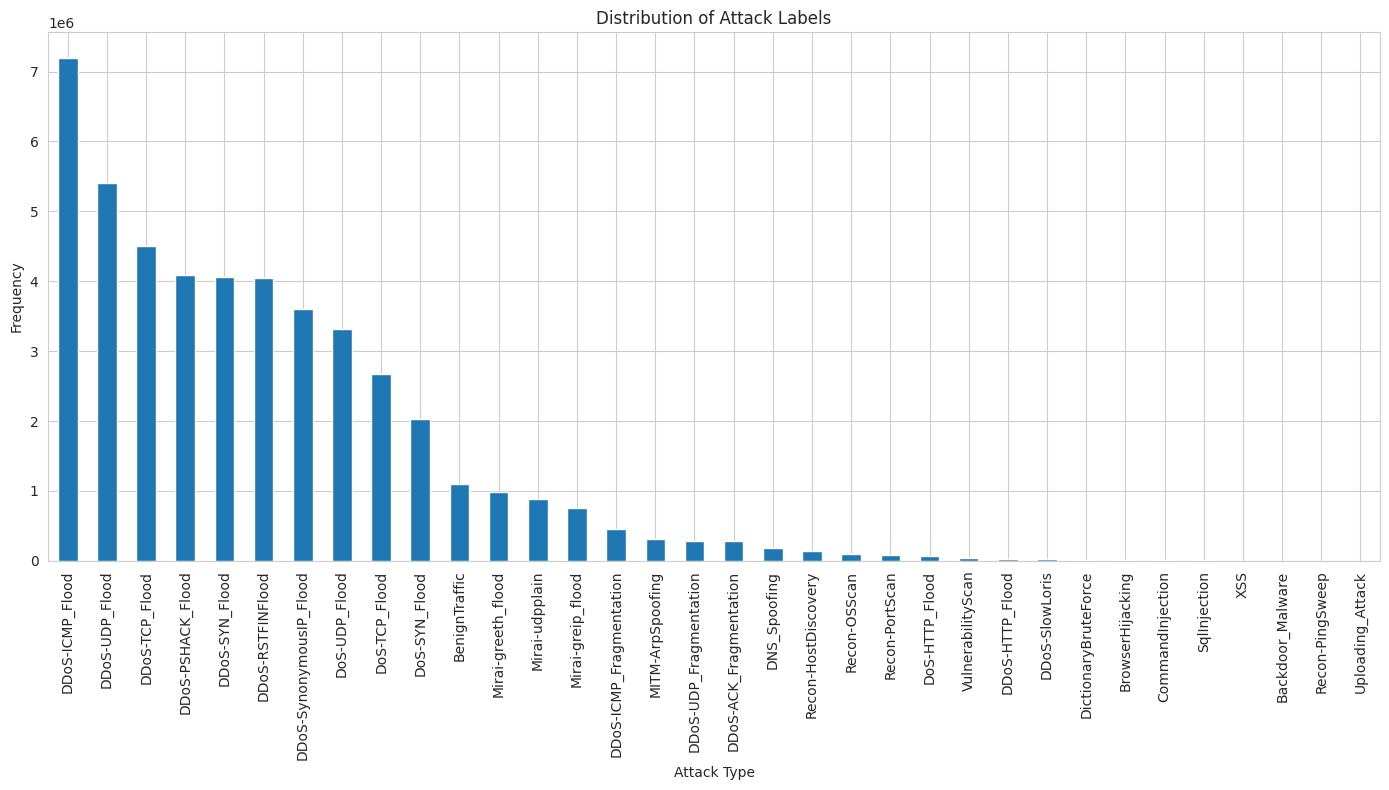

In [ ]:

sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
attack_label_counts.plot(kind='bar')
plt.title('Distribution of Attack Labels')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
class_labels = {
    'DDoS-UDP_Flood' : 'DDoS',
    'DDoS-TCP_Flood' : 'DDoS',
    'DDoS-ICMP_Flood' : 'DDoS',
    'DDoS-ACK_Fragmentation' : 'DDoS',
    'DDoS-UDP_Fragmentation' : 'DDoS',
    'DDoS-HTTP_Flood' : 'DDoS',
    'DDoS-SlowLoris' : 'DDoS',
    'DDoS-ICMP_Fragmentation' : 'DDoS',
    'DDoS-PSHACK_Flood' : 'DDoS',
    'DDoS-SynonymousIP_Flood' : 'DDoS',
    'DDoS-RSTFINFlood' : 'DDoS',
    'DDoS-SYN_Flood' : 'DDoS',

    'DoS-UDP_Flood' : 'DoS',
    'DoS-TCP_Flood' : 'DoS',
    'DoS-SYN_Flood' : 'DoS',
    'DoS-HTTP_Flood' : 'DoS',

    'DictionaryBruteForce' : 'Brute Force',


    'XSS' : 'web Based',
    'SqlInjection' : 'web Based',
    'BrowserHijacking' : 'web Based',
    'CommandInjection' : 'web Based',
    'Backdoor_Malware' : 'web Based',
    'Uploading_Attack' : 'web Based',

    'Recon-HostDiscovery' : 'Recon',
    'Recon-OSScan' : 'Recon',
    'Recon-PortScan' : 'Recon',
    'Recon-PingSweep' : 'Recon',
    'VulnerabilityScan' : 'Recon',

    'MITM-ArpSpoofing' : 'Spoofing',
    'DNS_Spoofing' : 'Spoofing',

    'Mirai-greeth_flood' : 'Miria',
    'Mirai-udpplain' : 'Miria',
    'Mirai-greip_flood' : 'Miria',

    'BenignTraffic': 'Benign'


}

# df_8_Classes['label'] = df['label'].apply(lambda x: class_labels.get(x, x))
df['Category'] = df['label'].map(class_labels)
category_label_counts = df['label'].apply(lambda x: class_labels.get(x, x)).value_counts()
category_label_counts

label
DDoS           33984560
DoS             8090738
Miria           2634124
Benign          1098195
Spoofing         486504
Recon            354565
web Based         24829
Brute Force       13064
Name: count, dtype: int64

## Distribution of Attack Categories (8 classes)

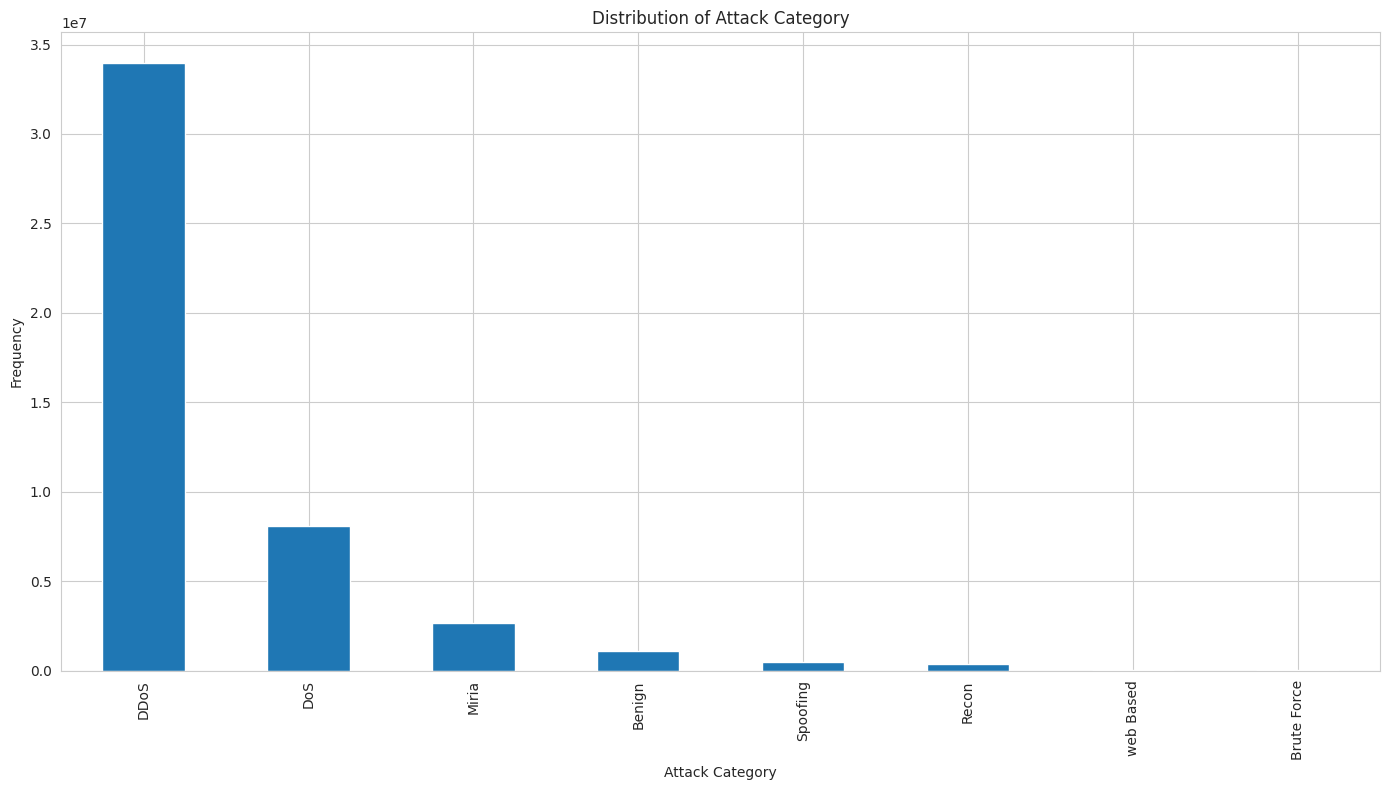

In [ ]:

sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
category_label_counts.plot(kind='bar')
plt.title('Distribution of Attack Category')
plt.xlabel('Attack Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
class_labels = {
    'DDoS-UDP_Flood' : 1,
    'DDoS-TCP_Flood' : 1,
    'DDoS-ICMP_Flood' : 1,
    'DDoS-ACK_Fragmentation' : 1,
    'DDoS-UDP_Fragmentation' : 1,
    'DDoS-HTTP_Flood' : 1,
    'DDoS-SlowLoris' : 1,
    'DDoS-ICMP_Fragmentation' : 1,
    'DDoS-PSHACK_Flood' : 1,
    'DDoS-SynonymousIP_Flood' : 1,
    'DDoS-RSTFINFlood' : 1,
    'DDoS-SYN_Flood' : 1,

    'DoS-UDP_Flood' : 1,
    'DoS-TCP_Flood' : 1,
    'DoS-SYN_Flood' : 1,
    'DoS-HTTP_Flood' : 1,

    'DictionaryBruteForce' : 1,


    'XSS' : 1,
    'SqlInjection' : 1,
    'BrowserHijacking' : 1,
    'CommandInjection' : 1,
    'Backdoor_Malware' : 1,
    'Uploading_Attack' : 1,

    'Recon-HostDiscovery' : 1,
    'Recon-OSScan' : 1,
    'Recon-PortScan' : 1,
    'Recon-PingSweep' : 1,
    'VulnerabilityScan' : 1,

    'MITM-ArpSpoofing' : 1,
    'DNS_Spoofing' : 1,

    'Mirai-greeth_flood' : 1,
    'Mirai-udpplain' : 1,
    'Mirai-greip_flood' : 1,

    'BenignTraffic': 0


}

df['attack'] = df['label'].map(class_labels)

attack_or_benign = df['attack'].value_counts()
attack_or_benign

attack
1    45588384
0     1098195
Name: count, dtype: int64

## IsAttack (2 classes)

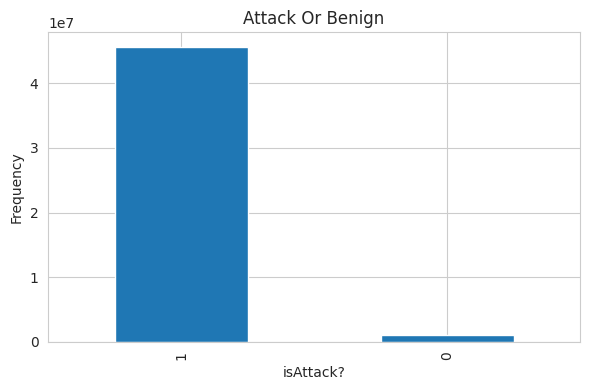

In [ ]:

sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
attack_or_benign.plot(kind='bar')
plt.title('Attack Or Benign')
plt.xlabel('isAttack?')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

<h2 style="color: orange;">Visualization of Correlation Matrix with Seaborn</h2>

In [ ]:
correlation_matrix = df_snb.drop("label", axis=1).corr()

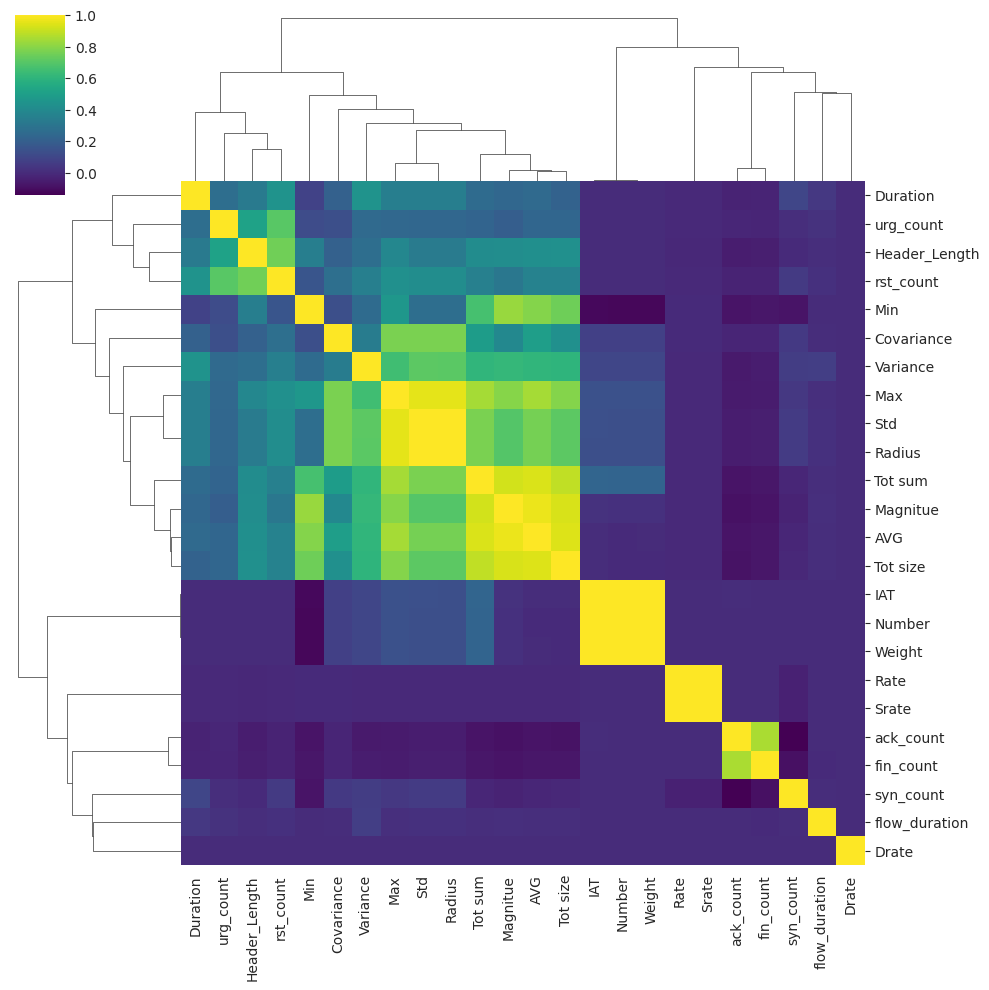

In [ ]:
sns.clustermap(correlation_matrix, cmap="viridis")

## Apply normalization techniques

In [ ]:
# columns = [
#         "Header_Length",
#         "Rate",
#         "Srate",
#         "Tot size",
#         "IAT",
#         "Covariance"]
# for column in columns:
#     df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


In [ ]:
df['Srate'].mean()

9069.878078812904

## Summary Statistics of Dataset

In [ ]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,attack
count,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,...,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07
mean,5.765449e+00,7.670596e+04,9.065690e+00,6.635072e+01,9.064057e+03,9.064057e+03,5.463949e-06,8.657207e-02,2.073353e-01,9.050473e-02,...,3.332481e+01,1.246916e+02,8.318253e+07,9.498489e+00,1.312182e+01,4.709498e+01,3.072436e+04,9.643760e-02,1.415124e+02,9.764773e-01
std,2.850342e+02,4.613317e+05,8.945533e+00,1.401919e+01,9.956249e+04,9.956249e+04,7.250766e-03,2.812070e-01,4.053978e-01,2.869035e-01,...,1.603357e+02,2.415493e+02,1.704735e+07,8.191532e-01,8.628579e+00,2.267696e+02,3.237107e+05,2.330010e-01,2.106831e+01,1.515566e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.091856e+00,2.091856e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,1.000000e+00
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.575423e+01,1.575423e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,1.000000e+00
75%,1.051381e-01,2.805550e+02,1.433000e+01,6.400000e+01,1.173848e+02,1.173848e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.719096e-01,5.406000e+01,8.334391e+07,9.500000e+00,1.039671e+01,5.059213e-01,1.344216e+00,8.000000e-02,1.415500e+02,1.000000e+00
max,3.943572e+05,9.907148e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,2.971522e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,1.238524e+04,1.358300e+04,1.676394e+08,1.500000e+01,1.648211e+02,1.755127e+04,1.549022e+08,1.000000e+00,2.446000e+02,1.000000e+00


***Distribution Analysis of Columns 'Protocol Type', 'flow_duration', and 'Rate'***

In [ ]:
p_counts = df['Protocol Type'].value_counts()
fd_counts = df['flow_duration'].value_counts()
r_counts = df['Rate'].value_counts()
p_counts , fd_counts , r_counts

(Protocol Type
 6.000000     22129711
 17.000000     6737648
 1.000000      5993897
 6.110000      1474110
 5.940000      1285536
                ...   
 1.558140            1
 15.531250           1
 20.660000           1
 0.270000            1
 1.505376            1
 Name: count, Length: 9358, dtype: int64,
 flow_duration
 0.000000e+00    25303791
 9.536743e-09        5993
 3.099442e-08        4379
 2.861023e-08        3499
 1.907349e-08        1952
                   ...   
 1.085461e-01           1
 3.302258e-02           1
 2.764087e+00           1
 5.632741e+00           1
 1.679977e+00           1
 Name: count, Length: 19377786, dtype: int64,
 Rate
 0.000000e+00    947054
 2.097152e+06     45628
 6.452775e+05     30081
 6.990507e+05     22066
 1.677722e+06     11064
                  ...  
 1.100405e+05         1
 3.293454e+03         1
 6.815461e+00         1
 1.739846e+02         1
 3.019842e+01         1
 Name: count, Length: 23810821, dtype: int64)

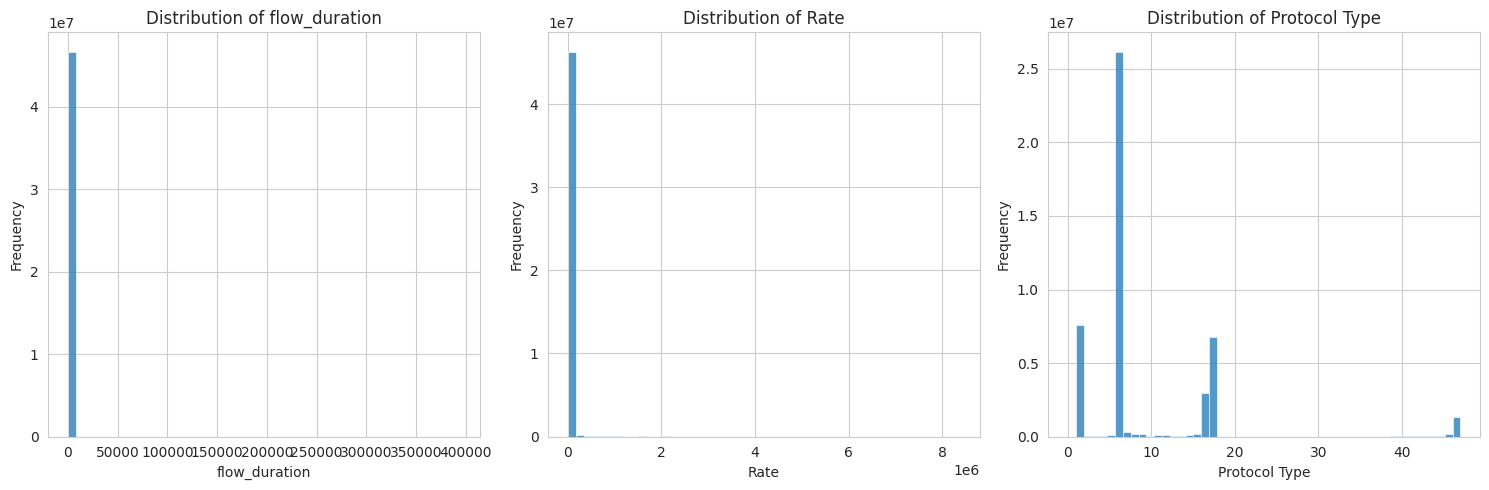

In [ ]:
features_to_plot = ['flow_duration', 'Rate', 'Protocol Type']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=50, kde=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

***Visualization of Correlation Matrix Heatmap for Selected Features and use categorical variables***

In [ ]:
df_cor = df[["flow_duration",
        "Header_Length", "Duration","Rate",
        "Srate","Drate","ack_count",
        "syn_count",
        "fin_count",
        "urg_count",
        "rst_count", "Tot sum","Min",
        "Max",
        "AVG",
        "Std",
        "Tot size",
        "IAT",
        "Number",
        "Magnitue",
        "Radius",
        "Covariance",
        "Variance",
        "Weight",
        "Category"]].sample(frac=0.1, random_state=1)

categorical_columns = df_cor.select_dtypes(include=['object']).columns

df_sampled = pd.get_dummies(df_cor, columns=categorical_columns)


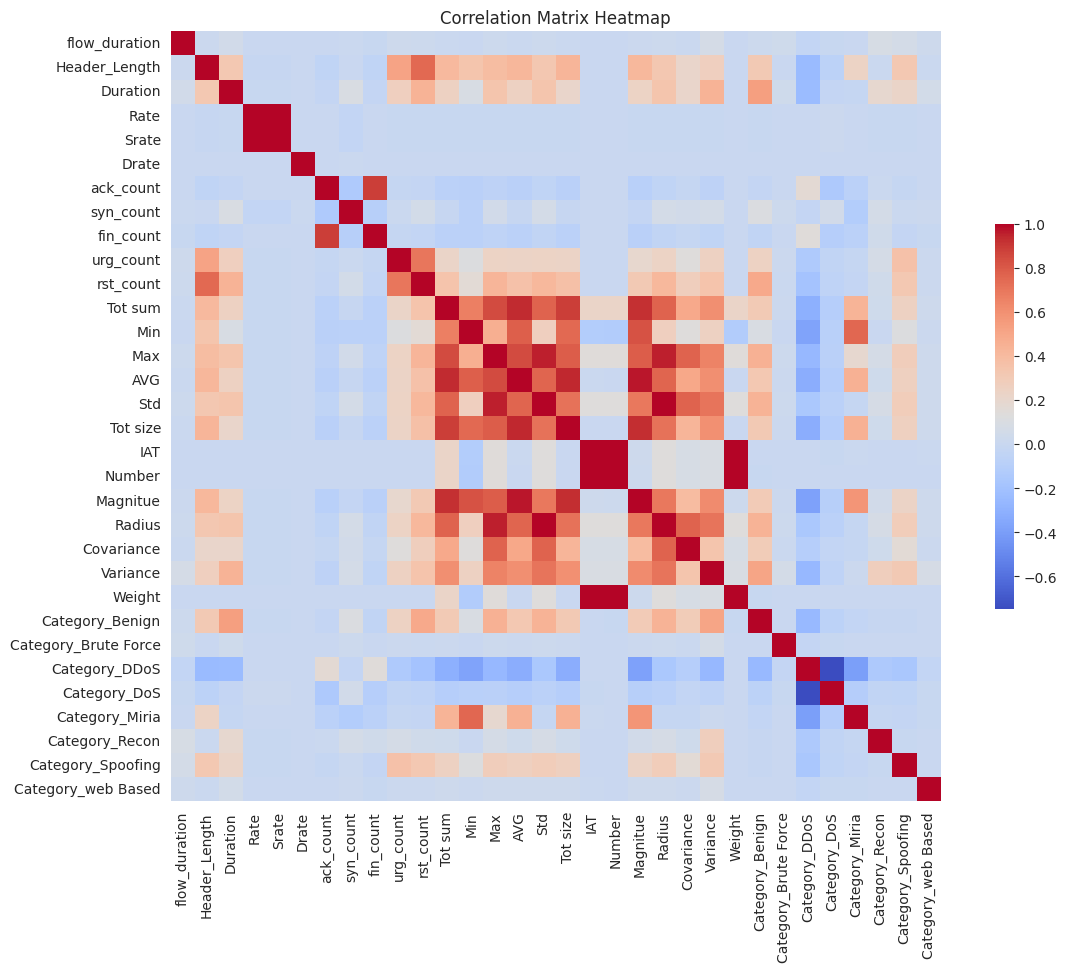

In [ ]:
corr_subset = df_sampled.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_subset, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()

## Protocol-based analysis
*the distribution of attack types across different protocol types
We'll group the data by 'Protocol Type' and see the count of each attack label within each protocol*

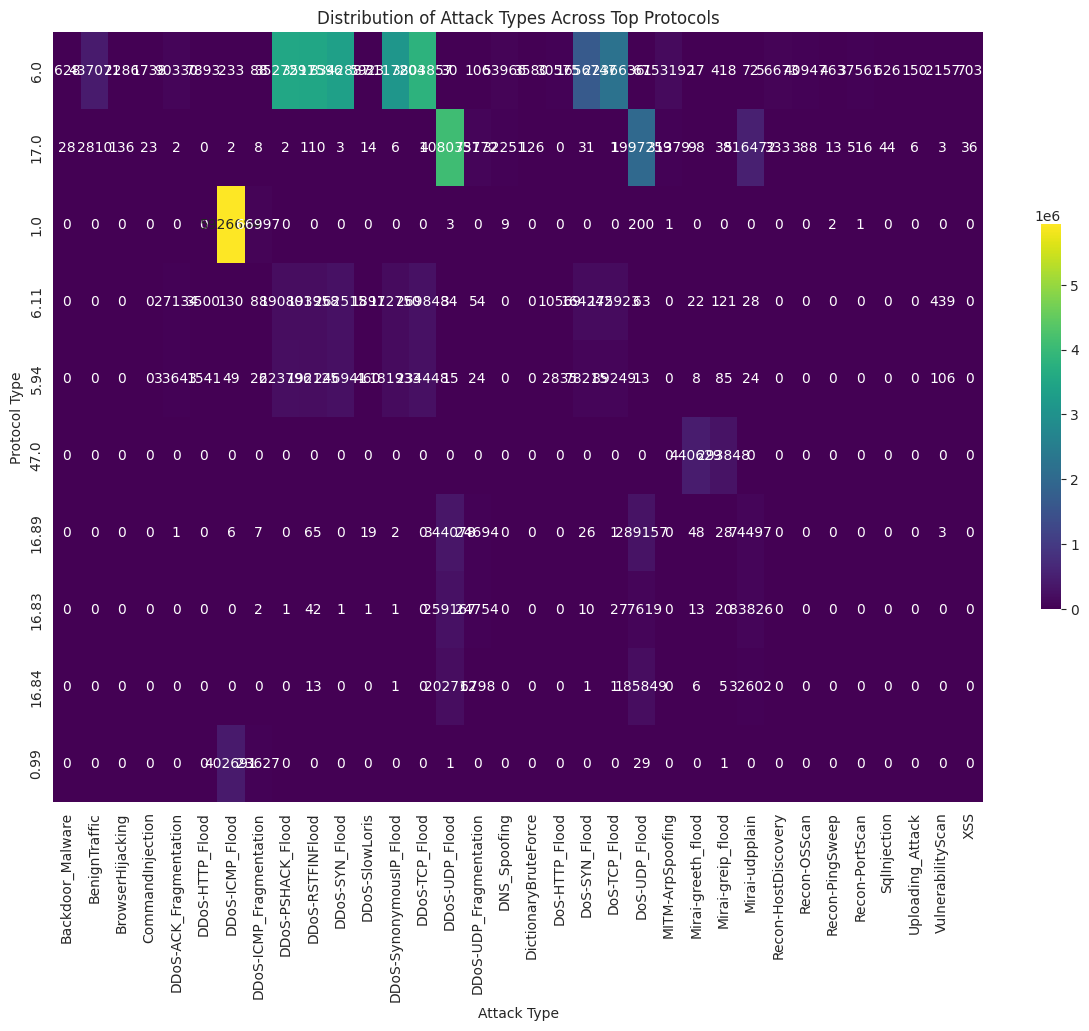

In [ ]:
protocol_attack_distribution = df.groupby('Protocol Type')['label'].value_counts().unstack(fill_value=0)

top_protocols = df['Protocol Type'].value_counts().head(10).index
protocol_attack_distribution_top = protocol_attack_distribution.loc[top_protocols]

plt.figure(figsize=(15, 10))
sns.heatmap(protocol_attack_distribution_top, annot=True, fmt="d", cmap='viridis', cbar_kws={"shrink": .5})
plt.title('Distribution of Attack Types Across Top Protocols')
plt.xlabel('Attack Type')
plt.ylabel('Protocol Type')
plt.show()

*the distribution of attack categories across different protocol types
We'll group the data by 'Protocol Type' and see the count of each attack category within each protocol*

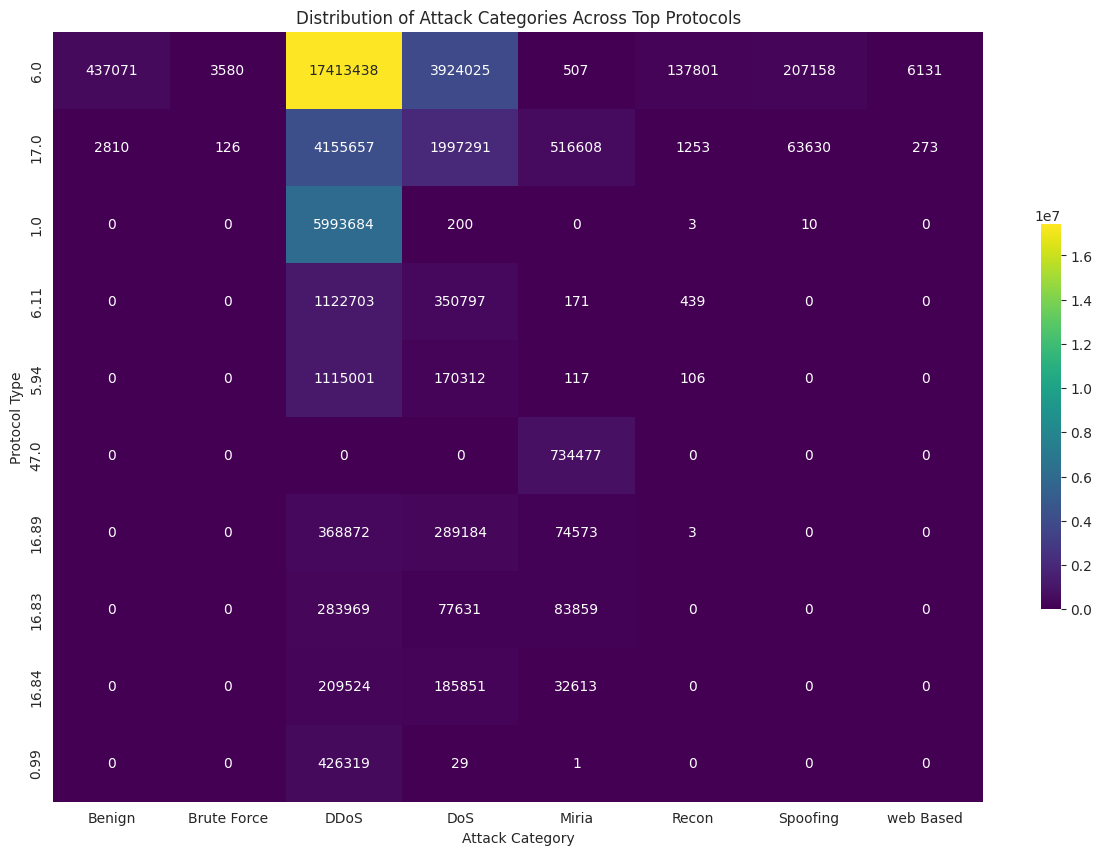

In [ ]:

protocol_attack_distribution = df.groupby('Protocol Type')['Category'].value_counts().unstack(fill_value=0)

top_protocols = df['Protocol Type'].value_counts().head(10).index
protocol_attack_distribution_top = protocol_attack_distribution.loc[top_protocols]

plt.figure(figsize=(15, 10))
sns.heatmap(protocol_attack_distribution_top, annot=True, fmt="d", cmap='viridis', cbar_kws={"shrink": .5})
plt.title('Distribution of Attack Categories Across Top Protocols')
plt.xlabel('Attack Category')
plt.ylabel('Protocol Type')
plt.show()

## Sum of Flags as Potential Vulnerability Indicators

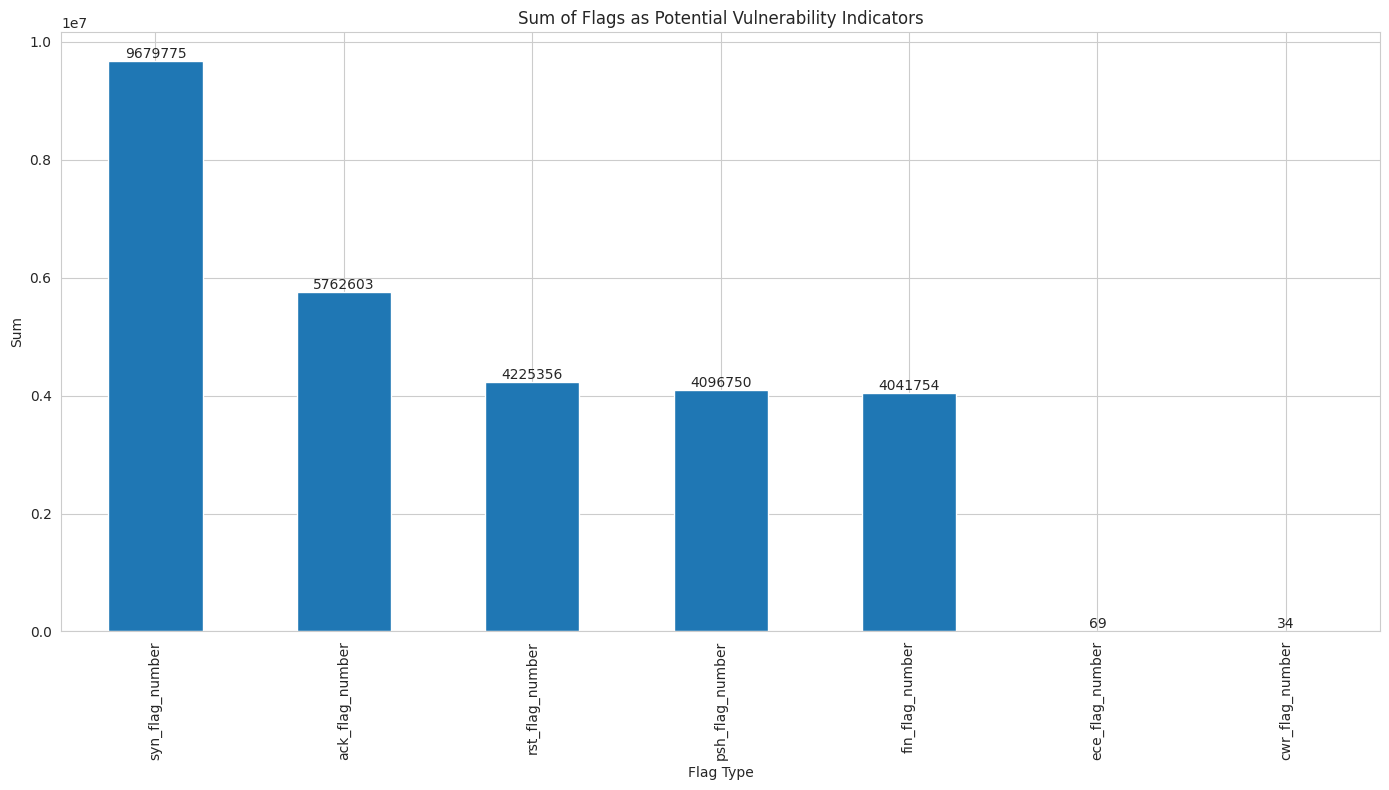

In [ ]:
plt.figure(figsize=(14, 8))
flags = ["fin_flag_number",
        "syn_flag_number",
        "rst_flag_number",
        "psh_flag_number",
        "ack_flag_number",
        "ece_flag_number",
        "cwr_flag_number"]
df_flags = df[flags].sum().sort_values(ascending=False)
df_flags.plot(kind='bar')
plt.title('Sum of Flags as Potential Vulnerability Indicators')
plt.xlabel('Flag Type')
plt.ylabel('Sum')
for index, value in enumerate(df_flags):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')  # Add text labels on bars
plt.tight_layout()
plt.show()

## the protocol distribution

In [ ]:
protocols = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP',"IPv","LLC"]
protocol_counts = df[protocols].sum().sort_values(ascending=False)
protocol_counts

LLC       46681318.0
IPv       46681318.0
TCP       26790359.0
UDP        9893707.0
ICMP       7643600.0
HTTPS      2572394.0
HTTP       2251891.0
DNS           6101.0
ARP           3090.0
SSH           1911.0
DHCP            80.0
IRC              7.0
SMTP             3.0
Telnet           1.0
dtype: float64

## Plot the protocol distribution

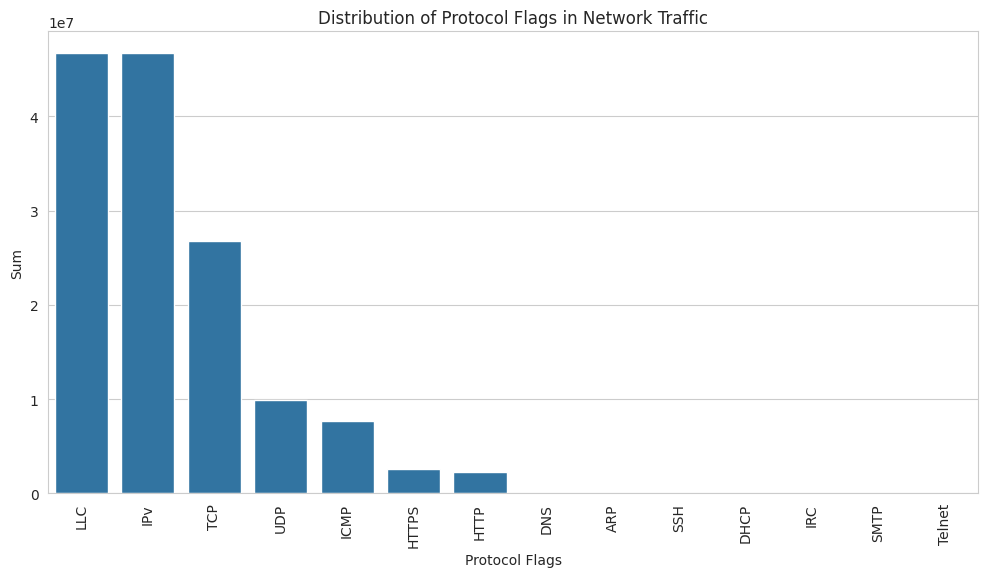

In [ ]:


plt.figure(figsize=(12, 6))
sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
plt.title('Distribution of Protocol Flags in Network Traffic')
plt.xlabel('Protocol Flags')
plt.ylabel('Sum')
plt.xticks(rotation=90)
plt.show()

## Packet Size Distribution

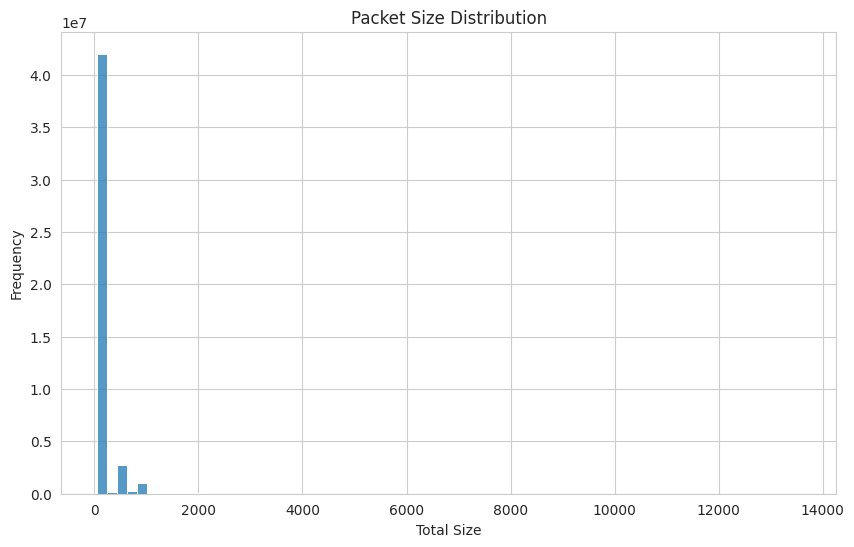

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tot size'], bins=70, kde=False)
plt.title('Packet Size Distribution')
plt.xlabel('Total Size')
plt.ylabel('Frequency')
plt.show()

## Inter-Arrival Time Distribution

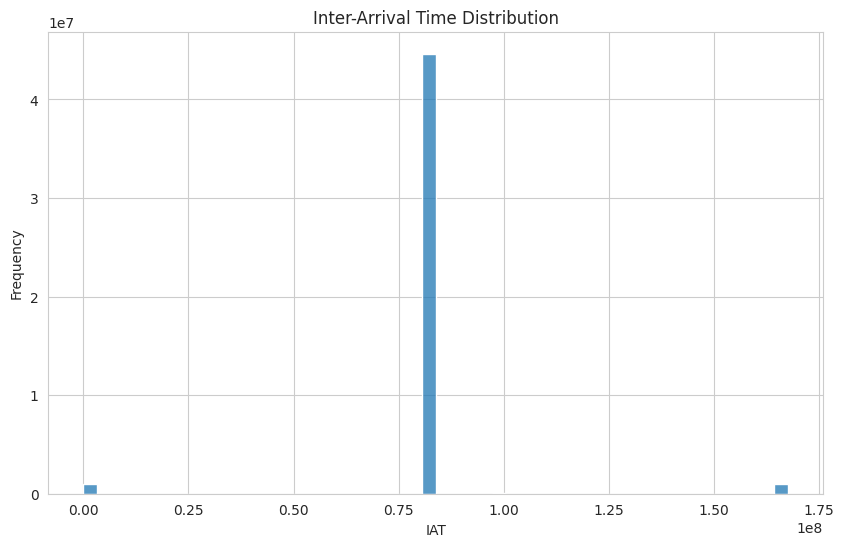

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IAT'], bins=50, kde=False)
plt.title('Inter-Arrival Time Distribution')
plt.xlabel('IAT')
plt.ylabel('Frequency')
plt.show()

***Apply Normalization with Sklearn***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

## Encode categorical data

In [ ]:
class_labels_Num = {
    'DDoS-UDP_Flood' : 1,
    'DDoS-TCP_Flood' : 2,
    'DDoS-ICMP_Flood' : 3,
    'DDoS-ACK_Fragmentation' : 4,
    'DDoS-UDP_Fragmentation' : 5,
    'DDoS-HTTP_Flood' : 6,
    'DDoS-SlowLoris' : 7,
    'DDoS-ICMP_Fragmentation' : 8,
    'DDoS-PSHACK_Flood' : 9,
    'DDoS-SynonymousIP_Flood' : 10,
    'DDoS-RSTFINFlood' : 11,
    'DDoS-SYN_Flood' : 12,

    'DoS-UDP_Flood' : 13,
    'DoS-TCP_Flood' : 14,
    'DoS-SYN_Flood' : 15,
    'DoS-HTTP_Flood' : 16,

    'DictionaryBruteForce' : 17,


    'XSS' : 18,
    'SqlInjection' : 19,
    'BrowserHijacking' : 20,
    'CommandInjection' : 21,
    'Backdoor_Malware' : 22,
    'Uploading_Attack' : 23,

    'Recon-HostDiscovery' : 24,
    'Recon-OSScan' : 25,
    'Recon-PortScan' : 26,
    'Recon-PingSweep' : 27,
    'VulnerabilityScan' : 28,

    'MITM-ArpSpoofing' : 29,
    'DNS_Spoofing' : 30,

    'Mirai-greeth_flood' : 31,
    'Mirai-udpplain' : 32,
    'Mirai-greip_flood' : 33,

    'BenignTraffic': 0


}
class_category_num = {
    "Benign" :  0,
    "DDoS" :  1,
    "DoS" :  2,
    "Miria" :  3,
    "Spoofing" :  4,
    "Recon" :  5,
    "web Based" :  6,
    "Brute Force" :  7
}
df['label'] = df['label'].apply(lambda x: class_labels_Num.get(x, x))
df['Category'] = df['Category'].apply(lambda x: class_category_num.get(x, x))

## Split the dataset train = 80% dataset test = 20% dataset

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

### Write the DataFrame to HDFS as a CSV file

In [ ]:
hdfs_train_path = "hdfs://127.0.0.1:9000/alldata/train.csv"
hdfs_test_path = "hdfs://127.0.0.1:9000/alldata/test.csv"

In [ ]:
train_df.write.csv(hdfs_train_path, header=True)

In [ ]:
test_df.write.csv(hdfs_test_path, header=True)